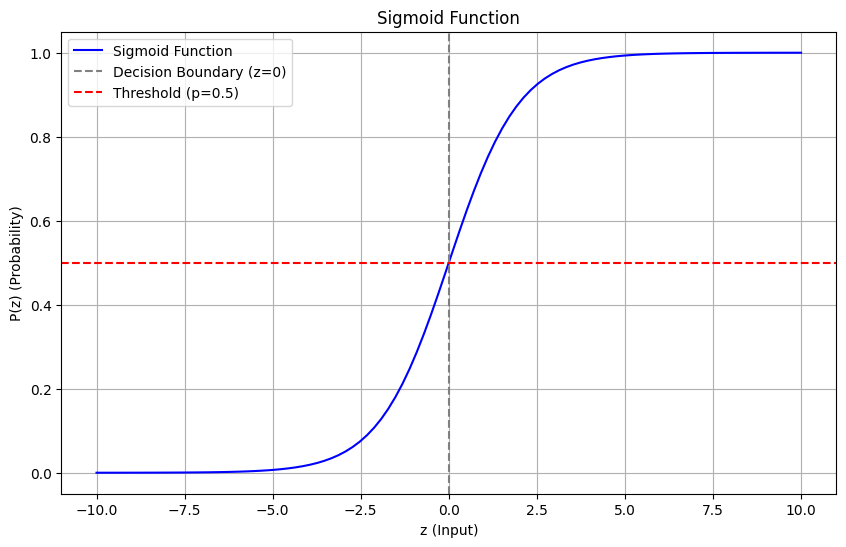

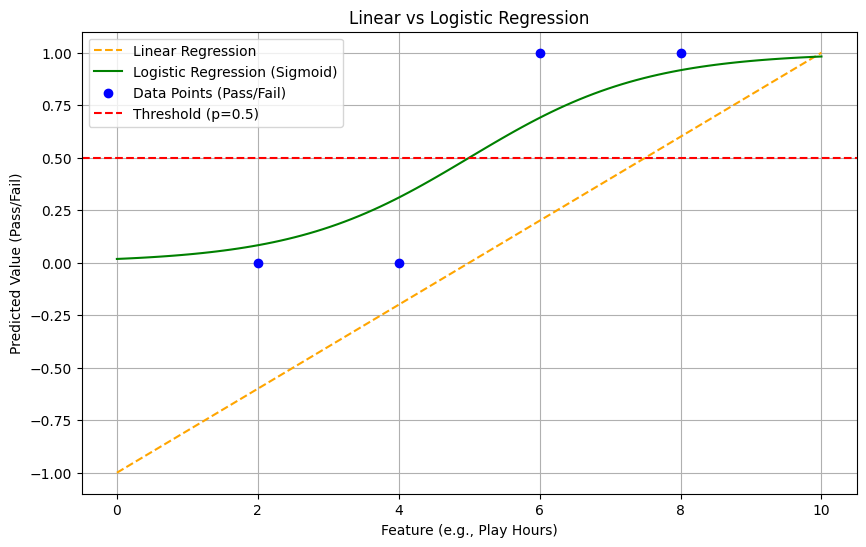

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Data for sigmoid plot
z = np.linspace(-10, 10, 100)
p = sigmoid(z)

# Plot 1: Sigmoid Function
plt.figure(figsize=(10, 6))
plt.plot(z, p, label='Sigmoid Function', color='blue')
plt.axvline(0, linestyle='--', color='gray', label='Decision Boundary (z=0)')
plt.axhline(0.5, linestyle='--', color='red', label='Threshold (p=0.5)')
plt.title('Sigmoid Function')
plt.xlabel('z (Input)')
plt.ylabel('P(z) (Probability)')
plt.legend()
plt.grid()
plt.show()

# Data for linear vs logistic regression
x = np.linspace(0, 10, 100)
linear = 0.2 * x - 1  # Linear regression line
logistic = sigmoid(0.8 * x - 4)  # Logistic regression curve

# Plot 2: Linear vs Logistic Regression
plt.figure(figsize=(10, 6))
plt.plot(x, linear, label='Linear Regression', color='orange', linestyle='--')
plt.plot(x, logistic, label='Logistic Regression (Sigmoid)', color='green')
plt.scatter([2, 4, 6, 8], [0, 0, 1, 1], color='blue', label='Data Points (Pass/Fail)', zorder=5)
plt.axhline(0.5, linestyle='--', color='red', label='Threshold (p=0.5)')
plt.title('Linear vs Logistic Regression')
plt.xlabel('Feature (e.g., Play Hours)')
plt.ylabel('Predicted Value (Pass/Fail)')
plt.legend()
plt.grid()
plt.show()


### **Understanding Logistic Regression**

Logistic regression is used for solving classification problems. Unlike linear regression, it is designed to predict categorical outcomes, typically binary (e.g., pass/fail, yes/no).

- **Independent Variables**: Features or predictors used for classification.
- **Dependent Variable**: Binary classification outcome (e.g., pass = 1, fail = 0).

**Types of Classification:**

- **Binary Classification**: Two possible outcomes (e.g., pass or fail).
- **Multiclass Classification**: More than two outcomes (e.g., A, B, C, or D).

Logistic regression transforms classification problems into binary classification by squashing outputs to a probability range of 0 to 1 using the sigmoid function.

### **Why Not Use Linear Regression for Classification?**

Linear regression is not suitable for classification due to the following reasons:

- **Output Range**: Linear regression outputs values beyond the [0, 1] range, making it unsuitable for probability estimation.
- **Best Fit Line Changes Due to Outliers**: Predictions are significantly affected by outliers, leading to incorrect classifications.
- **Interpretability**: Outcomes can be less intuitive (e.g., probabilities outside [0, 1] are not valid).



### **Logistic Regression Algorithm**

1. **Input Data**:  
   Collect a dataset with independent variables $X$ (features) and dependent variable $Y$ (binary labels like Pass/Fail, 0/1). 

2. **Initialize Parameters**:  
   Set the initial weights $w$ and bias $b$, either to zeros or random values.

3. **Compute Linear Function**:  
   Calculate the linear combination $Z = wX + b$, where $Z$ represents the raw prediction values before activation.

4. **Apply Sigmoid Function**:  
   Transform linear values into probabilities using the sigmoid function:
   $
   P = \frac{1}{1 + e^{-Z}}
   $
   - Takes any input Z and squashes it between 0 and 1
   - Gives us valid probability values for classification

5. **Make Binary Predictions**:  
   Convert probabilities to binary predictions using a threshold:
   - If probability > 0.5: Predict class 1 (Pass)
   - If probability ≤ 0.5: Predict class 0 (Fail)

6. **Calculate Loss**:  
   Measure how wrong our predictions are using log loss:
   $
   L = -\frac{1}{N} \sum_{i=1}^N \left[ Y_i \log(P_i) + (1 - Y_i) \log(1 - P_i) \right]
   $
   - Penalizes confident wrong predictions more heavily
   - Has nice mathematical properties for optimization

7. **Update Model Parameters**:  
   Use gradient descent to improve predictions:
   $
   w_j := w_j - \alpha \frac{\partial L}{\partial w_j}, \quad b := b - \alpha \frac{\partial L}{\partial b}
   $
   - α controls how big steps we take (learning rate)
   - Take small steps in direction that reduces loss

8. **Train Until Ready**:  
   Repeat steps 3-7 until either:
   - Loss stops decreasing significantly
   - Reach maximum allowed iterations

9. **Use the Model**:  
   Final trained model can now:
   - Give probability estimates for new data
   - Make binary predictions using the 0.5 threshold



### **Log Loss Function and Regularization**

#### **Log Loss**:  
The binary cross-entropy loss is defined as:  
$
J(\theta, \mathbf{x}) = -y \log(h_\theta(x)) - (1 - y) \log(1 - h_\theta(x))
$  
This ensures penalization of wrong predictions more severely.

#### **Regularization**:  
To prevent overfitting, regularization adds penalties to large weights.  
1. **L2 Regularization (Ridge)**:  
   $
   J(\theta) = \text{Log Loss} + \frac{\lambda}{2} \sum_{j=1}^n w_j^2
   $
   Penalizes large weight values.

2. **L1 Regularization (Lasso)**:  
   $
   J(\theta) = \text{Log Loss} + \lambda \sum_{j=1}^n |w_j|
   $
   Encourages sparsity (feature selection).



### **Convergence Properties**
- Logistic regression's cost function is convex, ensuring optimization reaches a global minimum.
- Challenges in convergence can occur with improper learning rates or highly imbalanced data.


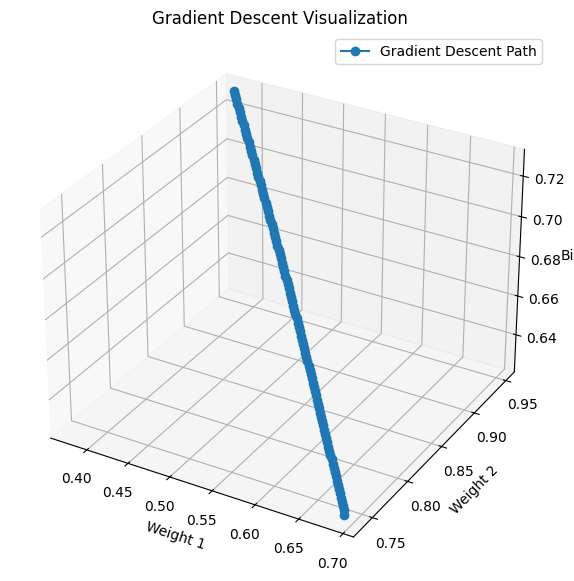

In [6]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate a dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
y = y.reshape(-1, 1)

# Step 2: Initialize parameters
np.random.seed(42)
w = np.random.rand(2, 1)
b = np.random.rand(1)
alpha = 0.01

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

# Gradients
def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    return dw, db

# Gradient Descent with logging for visualization
losses = []
weight_updates = []
bias_updates = []

for epoch in range(100):
    # Linear combination
    Z = np.dot(X, w) + b
    
    # Sigmoid activation
    y_pred = sigmoid(Z)
    
    # Compute loss
    loss = compute_loss(y, y_pred)
    losses.append(loss)
    
    # Compute gradients
    dw, db = compute_gradients(X, y, y_pred)
    
    # Update parameters
    w -= alpha * dw
    b -= alpha * db
    
    # Log weights and bias for visualization
    weight_updates.append(w.flatten())
    bias_updates.append(b.flatten())

# Prepare data for 3D plot
weight_updates = np.array(weight_updates)
bias_updates = np.array(bias_updates)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(weight_updates[:, 0], weight_updates[:, 1], bias_updates.flatten(), marker='o', label='Gradient Descent Path')
ax.set_title('Gradient Descent Visualization')
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Bias')

plt.legend()
plt.show()


In [9]:
import numpy as np
from sklearn.datasets import make_classification
import plotly.graph_objects as go

# Step 1: Generate a dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
y = y.reshape(-1, 1)

# Step 2: Initialize parameters
np.random.seed(42)
w = np.random.rand(2, 1)
b = np.random.rand(1)
alpha = 0.01

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

# Gradients
def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)
    return dw, db

# Gradient Descent with logging for visualization
losses = []
weight_updates = []
bias_updates = []

for epoch in range(100):
    # Linear combination
    Z = np.dot(X, w) + b
    
    # Sigmoid activation
    y_pred = sigmoid(Z)
    
    # Compute loss
    loss = compute_loss(y, y_pred)
    losses.append(loss)
    
    # Compute gradients
    dw, db = compute_gradients(X, y, y_pred)
    
    # Update parameters
    w -= alpha * dw
    b -= alpha * db
    
    # Log weights and bias for visualization
    weight_updates.append(w.flatten())
    bias_updates.append(b.flatten())

# Prepare data for 3D plot
weight_updates = np.array(weight_updates)
bias_updates = np.array(bias_updates)

# Create a 3D plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=weight_updates[:, 0],
    y=weight_updates[:, 1],
    z=bias_updates.flatten(),
    mode='markers+lines',
    marker=dict(size=5, color=losses, colorscale='Viridis', showscale=True),
    line=dict(color='blue', width=2),
    name='Gradient Descent Path'
))

fig.update_layout(
    title='Gradient Descent Visualization',
    scene=dict(
        xaxis_title='Weight 1',
        yaxis_title='Weight 2',
        zaxis_title='Bias'
    )
)

fig.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Filter to include only two classes for binary classification
df = df[df['target'] != 2]

# Define features and target variable
X = df.drop('target', axis=1)
y = df['target']


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         100.000000        100.000000         100.000000   
mean            5.471000          3.099000           2.861000   
std             0.641698          0.478739           1.449549   
min             4.300000          2.000000           1.000000   
25%             5.000000          2.800000           1.500000   
50%             5.400000          3.050000           2.450000   
75%             5.900000          3.400000           4.325000   
max             7.000000          4.400000           5.100000   

       petal width (cm)      target  
count        100.000000  100.000000  
mean           0.786000    0.500000  
std            0.565153    0.502519  
min            0.100000    0.000000  
25%            0.200000    0.000000  
50%            0.800000    0.500000  
75%            1.300000    1.000000  
max            1.800000    1.000000  


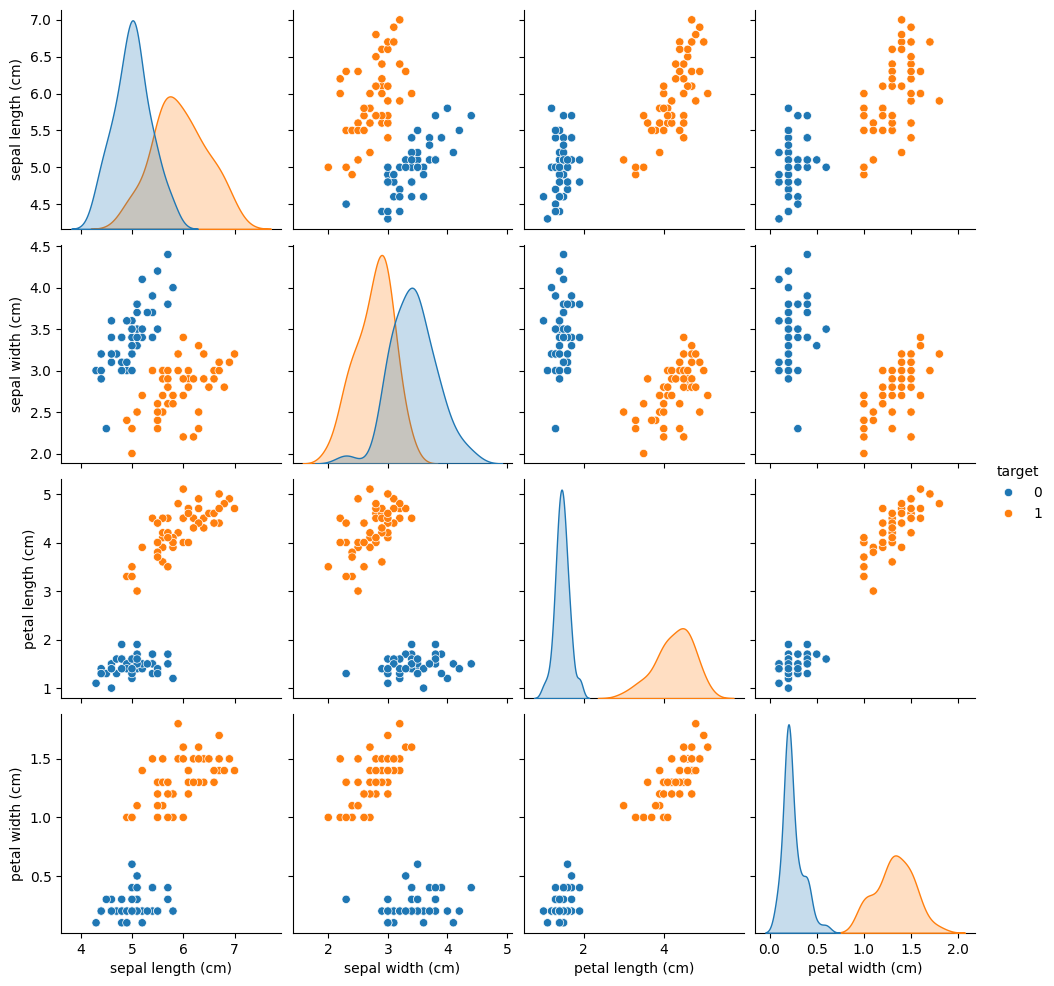

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [3]:
# Display basic statistics
print(df.describe())

# Visualize pairplot to observe relationships
sns.pairplot(df, hue='target')
plt.show()

# Check for missing values
print(df.isnull().sum())


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [6]:
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



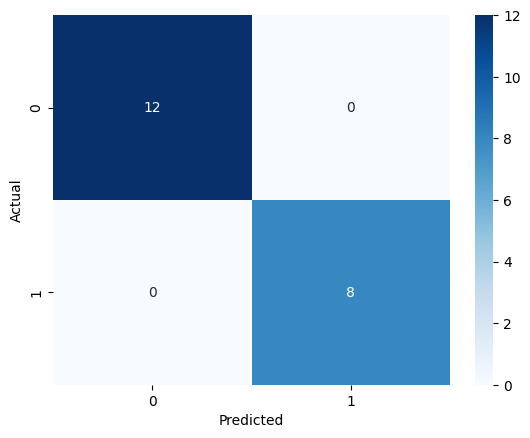

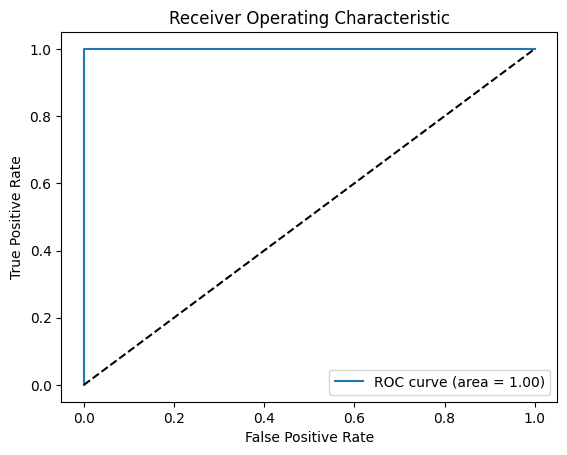

In [7]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

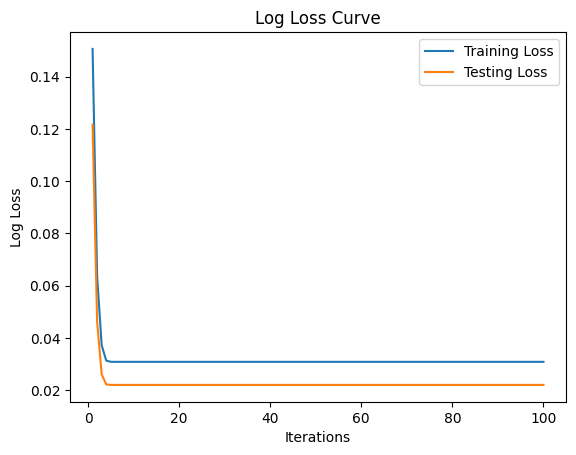

In [8]:
from sklearn.metrics import log_loss

# Initialize lists to store loss values
train_losses = []
test_losses = []

# Clone the model for iterative training
from sklearn.base import clone
iterative_model = clone(model)

# Iteratively train the model and record loss
for i in range(1, 101):
    iterative_model.max_iter = i
    iterative_model.fit(X_train, y_train)

    # Predict probabilities
    train_prob = iterative_model.predict_proba(X_train)
    test_prob = iterative_model.predict_proba(X_test)

    # Calculate log loss
    train_loss = log_loss(y_train, train_prob)
    test_loss = log_loss(y_test, test_prob)

    # Store losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curve
plt.plot(range(1, 101), train_losses, label='Training Loss')
plt.plot(range(1, 101), test_losses, label='Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss Curve')
plt.legend()
plt.show()
